Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/03_Classification'
except ImportError as e:
    pass

## Classification

In this exercise we will have a look at **classification**, which is a **supervised** machine learning task.
Supervised means that we know the correct answer for a given *training* dataset and need to learn a model to give this answer for unseen data.
According to the type of answer, supervised tasks are further differentiated into classification and regression tasks.
In classification tasks, the answer is a categorical value, such as 'red', 'green', 'yes', 'no', etc., while the answer in a regression task is a numerical value.

To introduce the classification methods, we will use the dataset of the first exercise task, which contains several features related to the weather and the *target variable* 'play', which indicates if someone should go and play golf under the given conditions or not.

### Classification
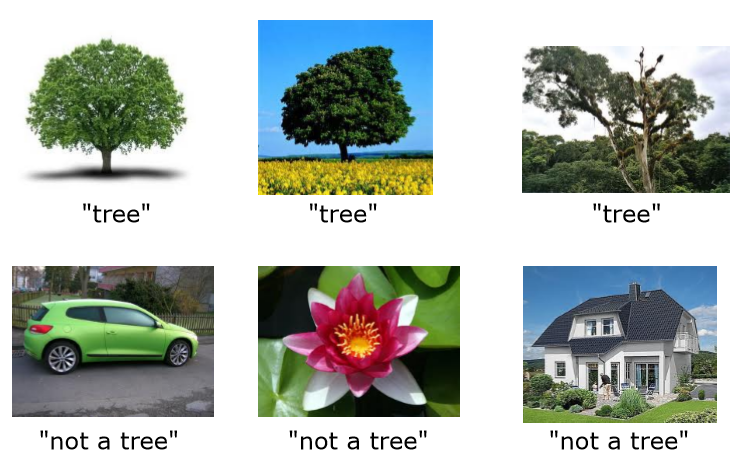

#### The classification workflow
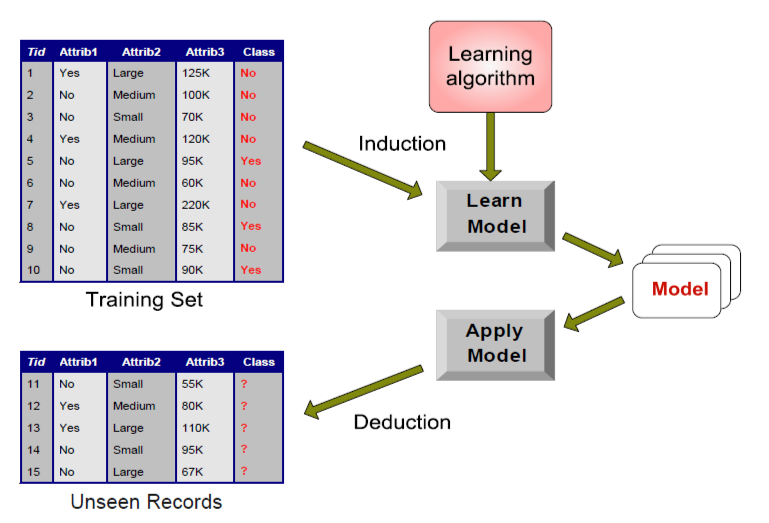

### Preprocessing

The gold dataset contains the categorical attributes 'Outlook' and 'Wind', which cannot be handled by all classifiers.
So we use an encoder to transform them into numerical values.

We also need to separate the target variable from the features.
The classifcication models in scikit-learn will use all attributes in the given dataset to construct a model. But as we do not know the target variable when applying the model, we must train it on the features only!
We will pass the values of the target variable separately to the classifier.

In [2]:
import pandas as pd
golf = pd.read_csv('golf.csv')
golf.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


### Preprocessing: Encoding
- most machine learning algorithms can only work with numerical data
- it is often necessary to [preprocess](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) the data before you can learn a reasonable model
- to "translate" text data to numerical data, we can use an encoder:
    - the [```OrdinalEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) assigns a integer to every distinct value in the feature. Note that this implies a meaningful ordering of the values!
    - the [```OneHotEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) creates a new attribute for every distinct value in the feature which can have the values 0 (the example does not have this value) or 1 (the example has this value)
    - similar to estimators, encoders provide the functions ```fit()``` and ```transform()```, as well as ```fit_transform()``` which combines the two functions


In [3]:
# import preprocessing
from sklearn import preprocessing

# show data before preprocessing
display(golf.head())

# create the OrdinalEncoder
ordinal_encoder = preprocessing.OrdinalEncoder()

# preprocess the features Product and ZipCode
golf_ordinal = golf.copy()
#fit the model (ordinal encoder) + transform
golf_ordinal[['Outlook', 'Wind']] = ordinal_encoder.fit_transform(golf_ordinal[['Outlook', 'Wind']])

# show the results
golf_ordinal.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


,Outlook,Temperature,Humidity,Wind,Play
0,2.0,85.0,85.0,0.0,no
1,2.0,80.0,90.0,1.0,no
2,0.0,83.0,78.0,0.0,yes
3,1.0,70.0,96.0,0.0,yes
4,1.0,68.0,80.0,0.0,yes


In [4]:
# show data before preprocessing
display(golf.head())

# create the OrdinalEncoder
one_hot_encoder = preprocessing.OneHotEncoder()

# preprocess the features Outlook and Wind
golf_one_hot = golf.copy()

encoded = pd.DataFrame(one_hot_encoder.fit_transform(golf_one_hot[['Outlook', 'Wind']]).toarray(), 
                       columns=one_hot_encoder.get_feature_names(['Outlook', 'Wind']))

golf_one_hot = golf_one_hot.drop(columns=['Outlook', 'Wind'])
golf_one_hot = golf_one_hot.join(encoded)
golf_one_hot

# binary only one needed !!!
# golf_one_hot = golf_one_hot.drop(columns=['Wind_False'])

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


,Temperature,Humidity,Play,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,no,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,no,0.0,0.0,1.0,0.0,1.0
2,83.0,78.0,yes,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,yes,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,yes,0.0,1.0,0.0,1.0,0.0
5,65.0,70.0,no,0.0,1.0,0.0,0.0,1.0
6,64.0,65.0,yes,1.0,0.0,0.0,0.0,1.0
7,72.0,95.0,no,0.0,0.0,1.0,1.0,0.0
8,69.0,70.0,yes,0.0,0.0,1.0,1.0,0.0
9,75.0,80.0,yes,0.0,1.0,0.0,1.0,0.0


In [6]:
# encoded

### Preprocessing: Normalisation

- numerical values often fall into different value ranges
- this results in different importance of the features when calculating similarity or distance functions between examples
- to prevent this, normalisation brings all features into the same value range:
    - the [```StandardScaler```](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) standardises features by **subtracting the mean and scaling to unit variance**
    - the [```MinMaxScaler```](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) transforms features by scaling each feature to a given **range; e.g. scale to [0,1]**. The default value of the range is [0,1]
    

In [10]:
# show data before preprocessing
display(golf_ordinal.head())

# create the normaliser
scaler = preprocessing.MinMaxScaler()
scaler2 = preprocessing.StandardScaler()

# preprocess the features ItemsBought and ItemsReturned
golf_min_max = golf_ordinal.copy()
golf_min_max[['Temperature', 'Humidity']] = scaler.fit_transform(golf_min_max[['Temperature', 'Humidity']])

golf_stand = golf_ordinal.copy()
golf_stand[['Temperature', 'Humidity']] = scaler2.fit_transform(golf_stand[['Temperature', 'Humidity']])


# show the results
display(golf_min_max.head())
display(golf_stand.head())

,Outlook,Temperature,Humidity,Wind,Play
0,2.0,85.0,85.0,0.0,no
1,2.0,80.0,90.0,1.0,no
2,0.0,83.0,78.0,0.0,yes
3,1.0,70.0,96.0,0.0,yes
4,1.0,68.0,80.0,0.0,yes


,Outlook,Temperature,Humidity,Wind,Play
0,2.0,1.000000,0.645161,0.0,no
1,2.0,0.761905,0.806452,1.0,no
2,0.0,0.904762,0.419355,0.0,yes
3,1.0,0.285714,1.000000,0.0,yes
4,1.0,0.190476,0.483871,0.0,yes


,Outlook,Temperature,Humidity,Wind,Play
0,2.0,1.804715,0.497155,0.0,no
1,2.0,1.015152,1.024440,1.0,no
2,0.0,1.488890,-0.241045,0.0,yes
3,1.0,-0.563974,1.657183,0.0,yes
4,1.0,-0.879799,-0.030131,0.0,yes


### Preprocessing: Label Encoder
- the target variable in scikit learn needs to be numerical
  - in the binary case, the values are `0` and `1`
  - by default `1` is the positive class
  
  -**does it automatically**

In [11]:
from sklearn import preprocessing

# create a variable with the values of the target variable
golf_target = golf_min_max['Play']

# and remove it from the dataframe so it only contains the features that our model should use
golf_min_max = golf_min_max.drop(columns='Play')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
golf_target = label_encoder.fit_transform(golf_target)

display("Features:")
display(golf_min_max)
display("Target:")
display(golf_target)

'Features:'

,Outlook,Temperature,Humidity,Wind
0,2.0,1.000000,0.645161,0.0
1,2.0,0.761905,0.806452,1.0
2,0.0,0.904762,0.419355,0.0
3,1.0,0.285714,1.000000,0.0
4,1.0,0.190476,0.483871,0.0
5,1.0,0.047619,0.161290,1.0
6,0.0,0.000000,0.000000,1.0
7,2.0,0.380952,0.967742,0.0
8,2.0,0.238095,0.161290,0.0
9,1.0,0.523810,0.483871,0.0


'Target:'

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

### Naives Bayes
- as an example we use a naive bayes classifier

In [13]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(golf_min_max, golf_target)

GaussianNB()

## Evaluation

After we learn a classification model on our training data, we must measure how good this model will work in a real-world application.
To make sure that this measurement is correct, we can't use the training data again!

Why can't we use the training data to measure how good the model works?
- we can measure a *training error*, which tells us how good the model represents the training dataset
- but this does not tell us anything about the error on other data points!
- imagine we create a 1-NN classifier - what would be the training error?

For a correct measurement we need a second dataset.
- we can either collect more data to create this *test data*
- or we split the dataset before training into two parts

We can then evaluate the performance of our classification model by applying it to the *test* dataset and measuring the error (more about this in the next lecture!).

Scikit-learn provides two important functions for such an evaluation
- ```confusion_matrix```:  returns the confusion matrix
- ```accuracy_score```: returns the accuracy measure

### Evaluation
- How do we know the model actually works?
    - By counting the number of errors
    - On a **different** dataset
- What’s the purpose of a model?
    - To apply it to new data where we don’t know the label
- What happened if we used the same dataset?
    - How many errors for a K-NN classifier with K=1?
    - How good would that model be on a different dataset?

### Confusion Matrix
For every class in our dataset, the classifier can produce one
of four possible results:
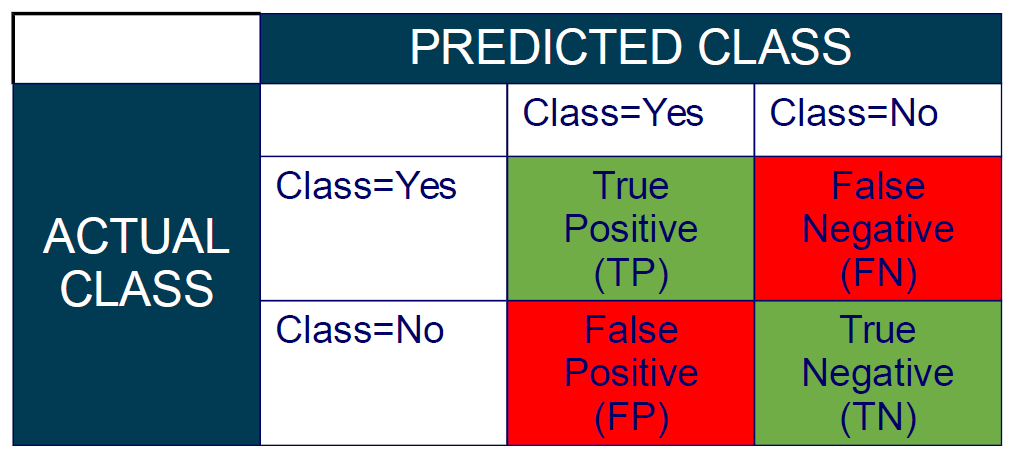

### Evaluation Measures: Accuracy

- A single measure that tells you the overall accuracy of the result
$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$
- “Number of correctly classified examples divided by the total number of examples.”
- Problem: Unbalanced data
    - If 99% belong to class “yes”
    - And classifier always says “yes” – 99% Accuracy **unbalaced never 100%?**


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#usually prediction of model -> right now random values
golf_prediction = label_encoder.transform(['yes','no','yes','yes','no','yes','yes','no','no','no','no','no','no','yes'])

#golf_prediction = naive_bayes.predict() no training data

display(golf_target)
display(golf_prediction)

print("Confusion Matrix:")
print(confusion_matrix(golf_target, golf_prediction))
print()

print("Accuracy: {}".format(accuracy_score(golf_target, golf_prediction)))

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

Confusion Matrix:
[[2 3]
 [6 3]]

Accuracy: 0.35714285714285715


### Visualising the confusion matrix

The following [sample code](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) visualises the confusion matrix for easier interpretation:


In [9]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

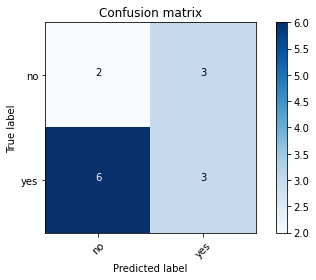

In [10]:
cnf_matrix = confusion_matrix(golf_target, golf_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)

### Evaluation on a test set

If we want to evaluate our model on a second dataset, we must take care to apply the **same preprocessing** as we did for the training.

In [11]:
golf_test = pd.read_csv('golf_testset.csv')

# create a variable with the values of the target variable
golf_target_test = golf_test['Play']
# and remove it from the dataframe so it only contains the features that our model should use
golf_test = golf_test.drop(columns='Play')
# encode the target variable into a numeric value
golf_target_test = label_encoder.transform(golf_target_test)

# just call transform because we already fitted to our training data and only want to apply this model to our test data
golf_test[['Outlook', 'Wind']] = ordinal_encoder.transform(golf_test[['Outlook', 'Wind']])
golf_test[['Temperature', 'Humidity']] = scaler.transform(golf_test[['Temperature', 'Humidity']])

golf_test.head()

,Outlook,Temperature,Humidity,Wind
0,2.0,1.000000,0.645161,0.0
1,0.0,0.761905,0.806452,1.0
2,0.0,0.904762,0.419355,0.0
3,1.0,0.285714,1.000000,0.0
4,1.0,0.190476,0.483871,1.0


After preprocessing, we can call the ```predict()``` function of our models to make predictions for the target variable.

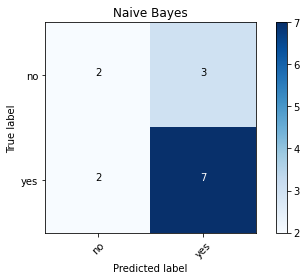

In [12]:
golf_prediction = naive_bayes.predict(golf_test)
cnf_matrix = confusion_matrix(golf_target_test, golf_prediction)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Naive Bayes')
plt.show()

### Try it yourself
- Task 3.1.1
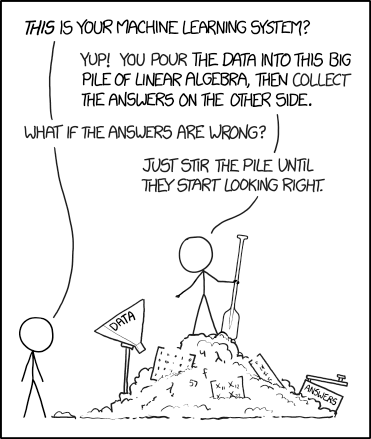

### Train / Test split

If we only have a single dataset available, we have to split the data for evaluation. This is called a 'train/test split' and provided by the function with the same name in scikit-learn: [```train_test_split()```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Parameters:
- ```test_size```: percentage of the examples that should be used for the test set (default = 0.25)
- ```random_state```: if None (default), data will be split randomly each time the function is called, if an integer is passed, the same split will be performed everytime the function is called
- ```stratify```: pass the target variable values again to perform **stratified sampling**

Return values:
- training features
- test features
- training target
- test target

In [22]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    golf, golf_target,test_size=0.2, random_state=42, stratify=golf_target)
#stratify = same distribution in test and train!

print("=======TRAIN=========")
display(data_train)
display(target_train)

=======TRAIN=========


,Outlook,Temperature,Humidity,Wind,Play
1,sunny,80.0,90.0,True,no
6,overcast,64.0,65.0,True,yes
4,rain,68.0,80.0,False,yes
13,rain,71.0,80.0,True,no
3,rain,70.0,96.0,False,yes
2,overcast,83.0,78.0,False,yes
5,rain,65.0,70.0,True,no
12,overcast,81.0,75.0,False,yes
0,sunny,85.0,85.0,False,no
9,rain,75.0,80.0,False,yes


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [23]:
import numpy as np
#train = 4 von 11  

In [24]:
print("=======TEST=========")
display(data_test)
display(target_test)

=======TEST=========


,Outlook,Temperature,Humidity,Wind,Play
7,sunny,72.0,95.0,False,no
11,overcast,72.0,90.0,True,yes
8,sunny,69.0,70.0,False,yes


array([0, 1, 1])

In [26]:
# test 1 out of 3


## K-Nearest-Neighbour
- Calculate the distance to all other points
- Choose the nearest K neighbours
- Let them vote for a class
- Requires
    - All known records
    - Distance metric
- Often very accurate
- But also slow
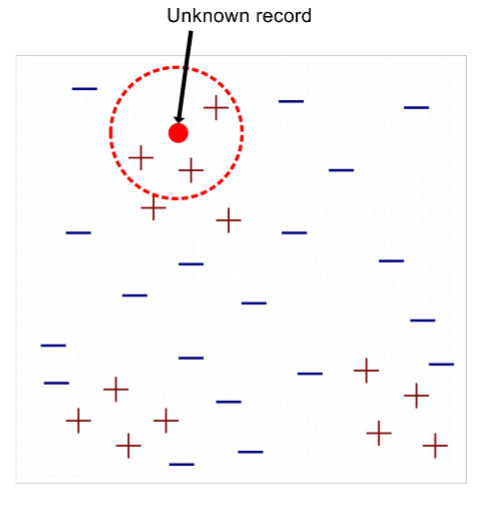

## K-Nearest-Neighbours Classification

The KNN classification is implemented in the [```KNeighborsClassifier``` class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in scikit-learn.
As every estimator, it provides the ```fit()```, ```predict()```.

Parameters:
- ```n_neighbors```: number of neighbours to consider (default = 5)
- ```weights```: weighted voting
    - ```'uniform'``` = same weight for all neighbours
    - ```'distance'``` = neighbours are weighted by their distance from the current example **(closer = higher voting)**
- ```metric```: [distance measure](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)
    - ```'euclidean'```: Euclidean distance
    - ```'manhattan'```: Manhattan distance
    - and more ...

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3) # number of neighbors n_neighbors
knn.fit(golf_min_max, golf_target)

KNeighborsClassifier(n_neighbors=3)

## What did we learn?

The following code plots a decision boundary for a classifier learned on the two features which are shown in each plot.

In [29]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import math
def plot_decision_boundary(df, target, estimator):
    # create a list of all columns that we are considering
    features = df.columns

    # create all combinations of considered columns
    combinations = list(itertools.combinations(features, 2))

    # create a figure and specify its size
    fig = plt.figure(figsize=(15,20))

    # go through all combinations and create one plot for each
    figure_index = 1
    plot_step = 0.02
    cols = 3
    rows =  math.ceil(len(combinations) / cols)
    for combination in combinations:
        # Plot the decision boundary
        plt.subplot(rows, cols, figure_index)
        figure_index += 1

        x_min, x_max = df[combination[0]].min() - 1, df[combination[0]].max() + 1
        y_min, y_max = df[combination[1]].min() - 1, df[combination[1]].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        estimator.fit(df[[combination[0], combination[1]]], target)
        Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdYlBu, shading='auto')

        plt.xlabel(combination[0])
        plt.ylabel(combination[1])
        
        for cls in set(target):
            group = df[ target == cls ]
            # plot the data points for the current group and feature combination
            plt.scatter(group[combination[0]], group[combination[1]], label=cls, edgecolor='black')

### Decision Boundaries for the 3 Nearest-Neighbours Classifier

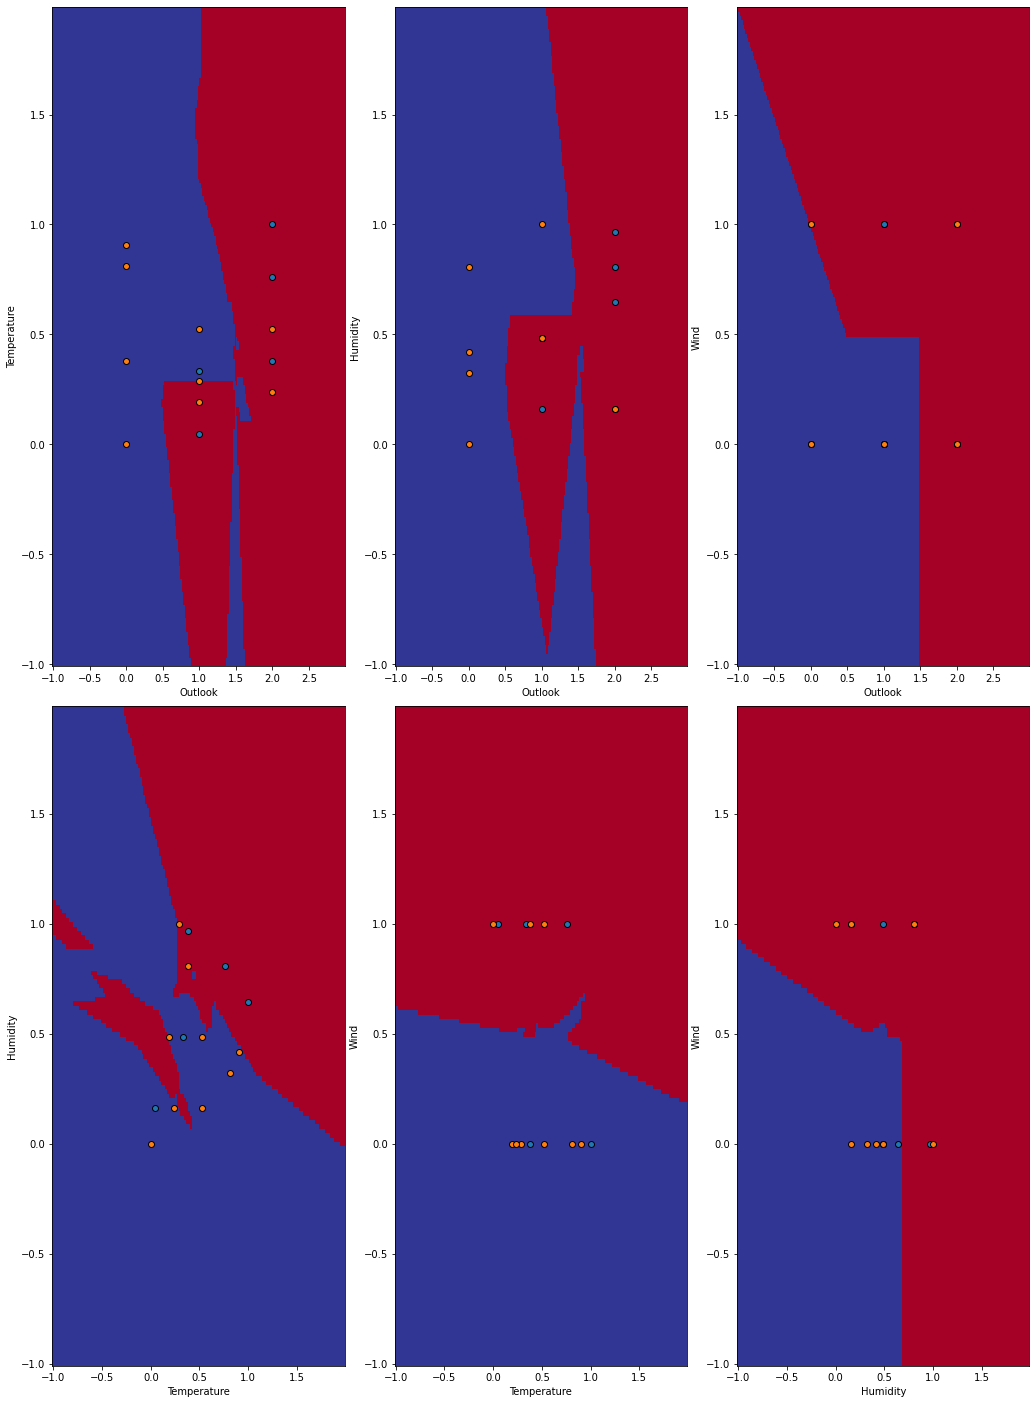

In [30]:
plot_decision_boundary(golf_min_max, golf_target, KNeighborsClassifier(4))

### Additional preprocessing: Binning (helps not that often)


In [32]:
from sklearn import preprocessing
display(golf.head())
# Group numeric values in bins !!!

# discretise the Temperature and Humidity features (optional!)
discretiser = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal')

golf_binned = golf.copy()
golf_binned[['Temperature', 'Humidity']] = discretiser.fit_transform(golf_binned[['Temperature', 'Humidity']])

print("Bins for 'Temperature':")
for i in range(discretiser.n_bins_[0]):
    lower = discretiser.bin_edges_[0][i]
    upper = discretiser.bin_edges_[0][i+1]
    print("\t{}:\t{} to {}".format(i, lower, upper))
    
print("Bins for 'Humidity':")
for i in range(discretiser.n_bins_[1]):
    lower = discretiser.bin_edges_[1][i]
    upper = discretiser.bin_edges_[1][i+1]
    print("\t{}:\t{} to {}".format(i, lower, upper))
display(golf_binned.head())

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


Bins for 'Temperature':
	0:	64.0 to 70.33333333333334
	1:	70.33333333333334 to 75.0
	2:	75.0 to 85.0
Bins for 'Humidity':
	0:	65.0 to 76.0
	1:	76.0 to 83.33333333333334
	2:	83.33333333333334 to 96.0


,Outlook,Temperature,Humidity,Wind,Play
0,sunny,2.0,2.0,False,no
1,sunny,2.0,2.0,True,no
2,overcast,2.0,1.0,False,yes
3,rain,0.0,2.0,False,yes
4,rain,0.0,1.0,False,yes
